In [1]:
import pandas as pd


data = pd.read_csv(filepath_or_buffer="./data.csv").to_numpy()

In [2]:

import numpy as np
from paddle.io import Dataset
import paddle
import warnings 

warnings.filterwarnings("ignore")
print(paddle.__version__)


2.3.0


In [3]:
class LinearNet(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        self.fc = paddle.nn.Linear(in_features=1,out_features=1)

    def forward(self,input):
        pred = self.fc(input)
        return pred

In [4]:
class LinearDataset(Dataset):
    def __init__(self,data: np.ndarray) -> None:
        super().__init__()
        self.data = data
    
    def __getitem__(self, idx):
        x = self.data[idx][0]
        y = self.data[idx][1]
        x = np.array([x],dtype="float32")
        y = np.array([y],dtype="float32")
        return x,y
       

    def __len__(self):
        return self.data.shape[0]

In [5]:
train = LinearDataset(data=data)


In [6]:
# step3:训练模型
model = paddle.Model(LinearNet())
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.MSELoss())
model.fit(train_data=train, epochs=50, batch_size=1, verbose=1)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/50
step 100/100 [==============================] - loss: 44806.7188 - 3ms/step           
Epoch 2/50
step 100/100 [==============================] - loss: 29239.0684 - 2ms/step           
Epoch 3/50
step 100/100 [==============================] - loss: 31977.9766 - 2ms/step           
Epoch 4/50
step 100/100 [==============================] - loss: 10910.7832 - 2ms/step           
Epoch 5/50
step 100/100 [==============================] - loss: 36958.5312 - 2ms/step           
Epoch 6/50
step 100/100 [==============================] - loss: 160859.7500 - 3ms/step        
Epoch 7/50
step 100/100 [==============================] - loss: 1766.6392 - 2ms/step           
Epoch 8/50
step 100/100 [==============================] - loss: 31212.5625 - 2ms/step          
Epoch 9/50
step 100/100 [==============================] - loss: 59267.7617 - 2ms/step          
Epoch 10/50
s

In [7]:
model.save("./data")

In [8]:
trial_data = np.random.random(size=(10,1)).astype(np.float32)*10
print(trial_data)
a = model.predict_batch([trial_data])

[[6.872793  ]
 [2.0017824 ]
 [0.7108223 ]
 [2.4258194 ]
 [6.1370525 ]
 [8.613617  ]
 [0.58299315]
 [3.653703  ]
 [4.4383855 ]
 [0.07261215]]


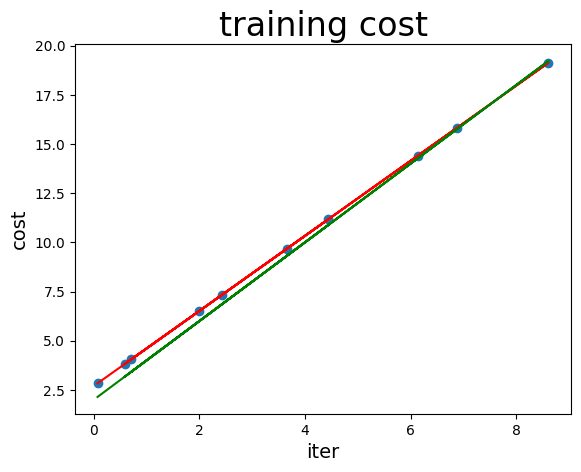

In [10]:
import matplotlib.pyplot as plt
plt.title("training cost", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.scatter(trial_data,a[0])
plt.plot(trial_data, a[0], color='red')
plt.plot(trial_data,2*trial_data+2,color='green')


plt.show()